## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Synthesize data
Synthetic data will be built using y = 2x + 3

In [2]:
def synthetic_data(x1, x2, num_examples):
    X = np.random.normal(0, 1, (num_examples, len(x1)))
    y = np.dot(X, x1) + x2
    y += np.random.normal(0, 1, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
x, y = synthetic_data(np.array([2]), 3, 1000)

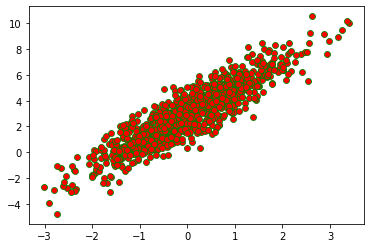

In [4]:
plt.scatter(x, y, marker = 'o', c = 'red', edgecolor = 'green', linewidths = 0.8)

## Initialize random x1 and x2 for your line

In [5]:
x1_init = np.random.random(x.shape[1]) #Initial value of theta0
x2_init = np.random.random(x.shape[1]) #Initial value of theta1
print(x1_init, x2_init)

[0.91440457] [0.41025204]


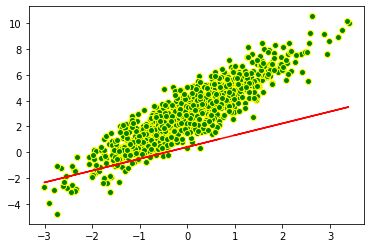

In [6]:
plt.figure()
plt.scatter(x, y, marker = 'o', c = 'green', edgecolor = 'yellow', linewidths = 1)
plt.plot(x, x1_init*x+x2_init, color = 'r')
plt.show()

## Loss Function
We will use the mean squared error as Loss function

In [7]:
def mse(x1, x2, scatter_x, scatter_y):
  n = len(scatter_x)
  J = sum([(scatter_x[i] * x1 + x2 - scatter_y[i]) ** 2 for i in range(n)])
  return J/n

In [8]:
mse(x1_init, x2_init, x, y)

array([8.98030837])

## Visualizing the loss function

In [9]:
def plot_mse(scatter_x, scatter_y):
  x1 = np.random.normal(0, 7, (2000, 1))
  x2 = np.random.normal(0, 7, (2000, 1))
  mse_wrt_x1 = [mse(i, x2[0], scatter_x, scatter_y) for i in x1]
  mse_wrt_x2 = [mse(x1[0], i, scatter_x, scatter_y) for i in x2]
  fig, ax = plt.subplots(1, 2, figsize = (20, 10))

  ax[0].plot(x1, mse_wrt_x1, color = 'red')
  ax[0].set_title("mse x1")

  ax[1].plot(x2, mse_wrt_x2, color = 'orange')
  ax[1].set_title("mse x2")

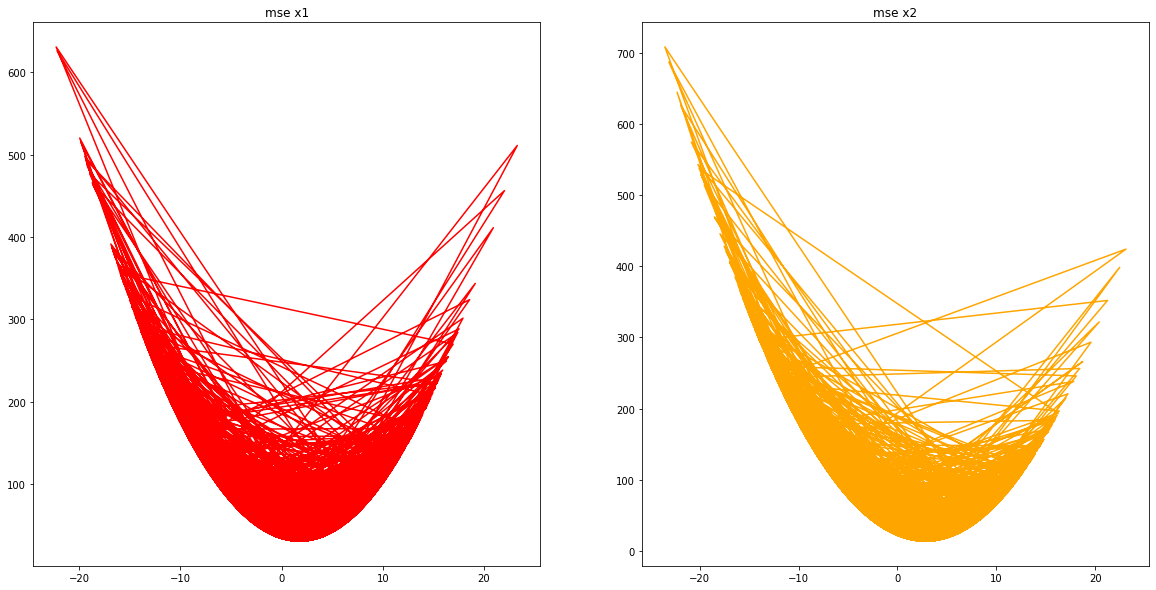

In [10]:
plot_mse(x, y)

x1 minima will be at 2<br>
x2 minima will be at 3

## Optimizer and training

In [11]:
def gradient_descent(lr, scatter_x, scatter_y, x1, x2, epochs):
  J_list = []
  n = len(scatter_x)
  line_list = []

  for i in range(epochs + 1):
    if i % 50 == 0:
      print("epoch:", i)

    loss = mse(x1, x2, scatter_x, scatter_y)
    J_list.append(loss)
    if i%50 ==0:
      print("mse:", loss)

    dx1 = 2 / n * (sum([(scatter_x[i] * x1 + x2 - scatter_y[i]) * scatter_x[i] for i in range(n)]))
    dx2 = 2 / n * (sum([(scatter_x[i] * x1 + x2 - scatter_y[i]) for i in range(n)]))

    x1 = x1 - lr * dx1
    x2 = x2 - lr * dx2

    line_list.append((x1,x2))
    if i%50 == 0:
      print()

  return x1, x2, line_list, J_list

In [12]:
predicted_x1, predicted_x2, line_list, J_list = gradient_descent(0.01, x, y, x1_init, x2_init, 500)

epoch: 0
mse: [8.98030837]

epoch: 50
mse: [1.94550904]

epoch: 100
mse: [1.07590908]

epoch: 150
mse: [0.967627]

epoch: 200
mse: [0.95403983]

epoch: 250
mse: [0.95232129]

epoch: 300
mse: [0.95210215]

epoch: 350
mse: [0.95207398]

epoch: 400
mse: [0.95207033]

epoch: 450
mse: [0.95206986]

epoch: 500
mse: [0.95206979]



In [13]:
predicted_x1, predicted_x2

(array([1.98481454]), array([2.98281073]))

Approximately we get the value of x1 as 2 and x2 as 3

## Visualizing Results

#### Cost function vs epoch

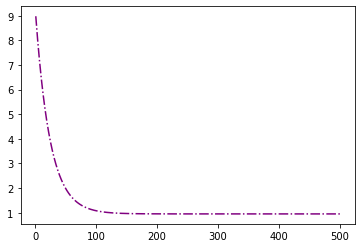

In [14]:
plt.plot([i for i in range(1, 502)], J_list, color = 'purple', linestyle = '-.')

#### Final predicted best fit line

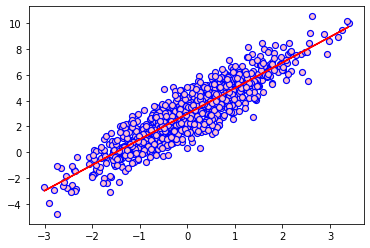

In [15]:
plt.figure()
plt.scatter(x, y, marker = 'o', c = 'pink', edgecolor = 'blue', linewidths = 1.2)
plt.plot(x, predicted_x1 * x + predicted_x2, 'r')
plt.show()

#### Visualizing the progress with epochs

Text(0.5, 1.0, 'epoch 160')

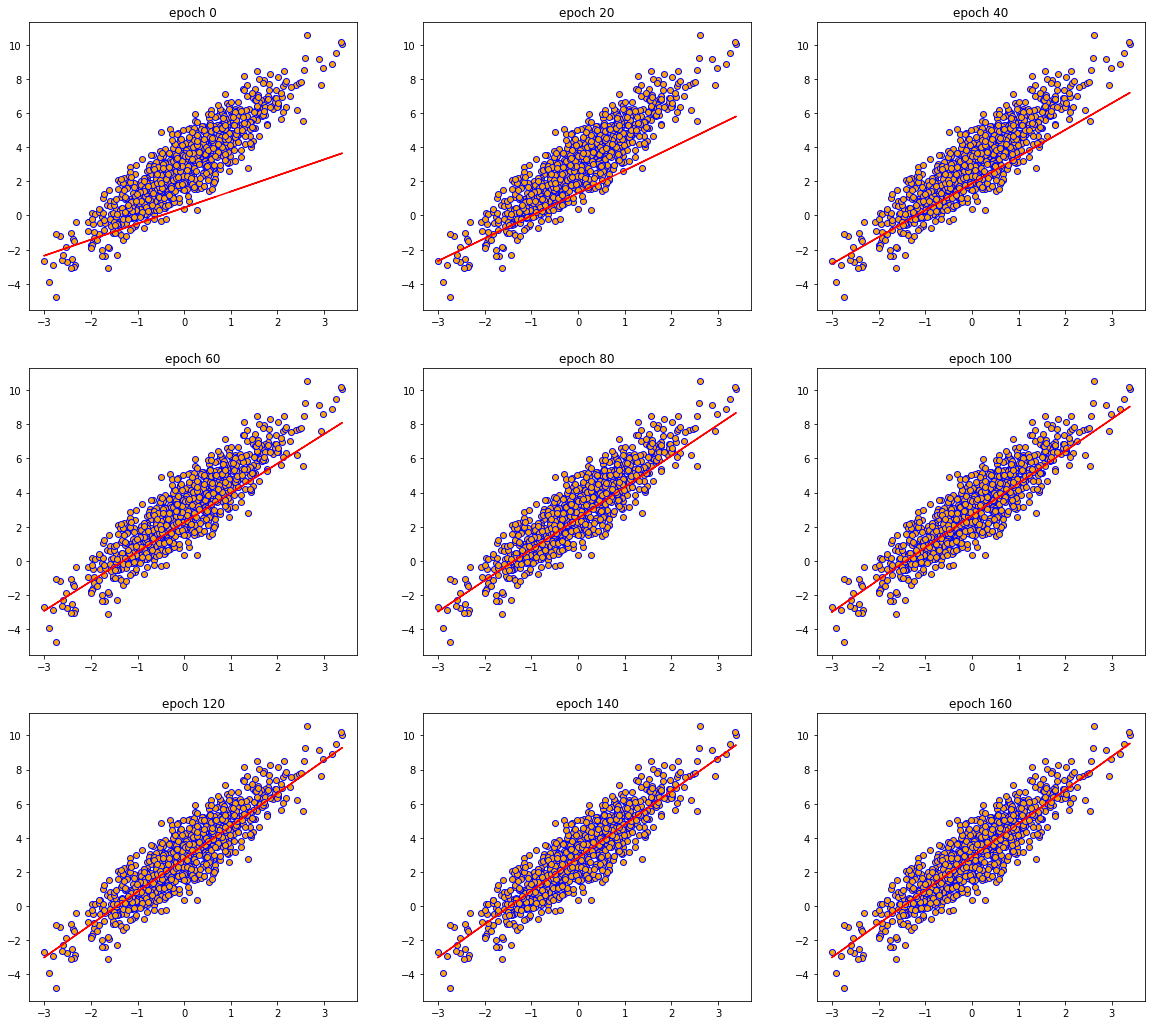

In [16]:
fig, axarr = plt.subplots(3, 3, figsize=(20, 18))

axarr[0][0].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[0][0].plot(x, line_list[0][0] * x + line_list[0][1], 'r')
axarr[0][0].set_title("epoch 0")

axarr[0][1].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[0][1].plot(x, line_list[20][0] * x + line_list[20][1], 'r')
axarr[0][1].set_title("epoch 20")

axarr[0][2].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[0][2].plot(x, line_list[40][0] * x + line_list[40][1], 'r')
axarr[0][2].set_title("epoch 40")

axarr[1][0].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[1][0].plot(x, line_list[60][0] * x + line_list[60][1], 'r')
axarr[1][0].set_title("epoch 60")

axarr[1][1].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[1][1].plot(x, line_list[80][0] * x + line_list[80][1], 'r')
axarr[1][1].set_title("epoch 80")

axarr[1][2].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[1][2].plot(x, line_list[100][0] * x + line_list[100][1], 'r')
axarr[1][2].set_title("epoch 100")

axarr[2][0].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[2][0].plot(x, line_list[120][0] * x + line_list[120][1], 'r')
axarr[2][0].set_title("epoch 120")

axarr[2][1].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[2][1].plot(x, line_list[140][0] * x + line_list[140][1], 'r')
axarr[2][1].set_title("epoch 140")

axarr[2][2].scatter(x, y, marker = 'o', c = 'orange', edgecolor = 'blue', linewidths = 1)
axarr[2][2].plot(x, line_list[160][0] * x + line_list[160][1], 'r')
axarr[2][2].set_title("epoch 160")